# Conservation of Energy

The equation of the conservation of energy is expressed as:

$$ \Delta \left( H + \frac { u^2 }{2} + gZ \right) = Q - W_s $$

Where:
* $Q$       is the amount of heat per unit mass given to the control volume element from surroundings <br />
* $W_s$     is the shaft work per unit mass (which is zero in this case) <br />
* $H$       is the enthalpy per unit mass <br />
* $Z$       is the elevation from the datum line <br />
* $g$       is the acceleration due to gravity <br />

Schematic diagram of $i^{th}$ control volume element of a pipeline, $T$,  $P$, $Z$ and $\dot{m}$ represent temperature, pressure, elevation and mass flow rate at the node $i-1$ and $i$, respectively.

<img src="images/radial_section.png",width=200,height=200>

The cross-sectional view of the element shows the positive heat flux $Q_i$, $r_1$, $r_2$ and $r_3$ are radii of inner and outer part of the pipeline and outer part of the insulation over it, respectively.

<img src="images/cross_section.png",width=100,height=100>

The rate of heat transfer to the control volume element to the surroundings (Rajput, 1999) is given by:

$$H_{T} = - \frac{\ 2 \pi dL (T_{in} - T_{out}) }
    {\left[\frac{1}{h_{in}r_1} 
    + \frac{ln \left(\frac{r_2}{r_1} \right)} {k_A}
    + \frac{ln \left(\frac{r_3}{r_2} \right)} {k_B}
    + \frac{1}{h_{out}r_3}
    \right]}$$

In [287]:
#Import Libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Define Pipe and Insulation Variables

In [288]:
#Convective heat transfer coefficient (h; W/m**K)
h_steam_pipe = 36
h_insulation_air = 7
#Insulation
t_insulation = 2 * 0.0254    #insulation thickness (m)
k_insulation = 0.05   #insulation's thermal conductivity (W/m** K)
#Pipe
t_pipe = 0.01         #pipeline thickness (m)
k_pipe = 56           #pipe's thermal conductivity (W/m** K)
id_pipe = 0.25        #pipe's inner diameter (m)
l_pipe = 6000         #length of pipeline (m)
#Temp
t1 = 180.21           #temp inside the pipeline
t2 = 23               #temp; atmospheric 

# Define Main and Sub Functions

In [289]:
def convection (h, r):
    """convective heat transport steam and inner pipe"""
    return 1/(h*r)

def conduction (r1, r2, k):
    """conductive heat transport across pipe and insulation"""
    return math.log(r2/r1) / k

def heat_transfer(L, t_in, t_out, h_in, h_out, k_a, k_b, r1, r2, r3):
    pi_2 = 2 * math.pi
    numerator = pi_2 * L * (t_in - t_out)
    c1 = convection(h_in, r1)
    c2 = conduction(r1, r2, k_a)
    c3 = conduction(r2, r3, k_b)
    c4 = convection(h_out, r3)
    c_tot = c1 + c2 + c3 + c4
    return -(numerator / c_tot)

def calc_heat_loss(x, t_in, t_out, h_in, h_out, k_a, k_b, r1, r2, r3):
    tot_loss = []
    for i in x:
        loss = heat_transfer(i, t_in, t_out, h_in, h_out, k_a, k_b, r1, r2, r3)
        tot_loss.append(loss)
    tot_loss = np.absolute(tot_loss)/1000000
    return tot_loss

# Sample Calculation

In [302]:
r1 = id_pipe
r2 = id_pipe + t_pipe
r3 = id_pipe + t_pipe + t_insulation

heat_loss = heat_transfer(l_pipe, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, k_insulation, r1, r2, r3)
heat_loss = np.absolute(heat_loss)/1000000
print ("Total heat loss is", '{:^7.2f}'.format(heat_loss), "Megawatts")

Total heat loss is  1.43   Megawatts


In [291]:
%%time
nL = 6     #number of divisions
dL = l_pipe/nL   #delta L; increment length

#create the list of distances that will be used to calc heat_loss 
x = np.linspace(0, l_pipe, nL+1)

#calculate the heat loss for the given list of distances 'x'; output will be a list of heat loss also
normal_loss = calc_heat_loss(x, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, k_insulation, r1, r2, r3)
#for max heat loss; no insulation; insulation thickness = 0; thus r2 = r3
max_loss = calc_heat_loss(x, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, k_insulation, r1, r2, r2)

#get the absolute value (sign is just for the direction of heat flow); and convert watts to megawatts
#max_loss = np.absolute(max_loss)/1000000
#normal_loss = np.absolute(normal_loss)/1000000

Wall time: 0 ns


In [292]:
#Define the plot properties
plt.plot(x, normal_loss, '--b', alpha=0.8, label='with insulation')
plt.plot(x, max_loss, '--r', label='no insulation')
plt.xlabel("Pipe Length (m)")
plt.ylabel("Heat Loss (MWe)")
plt.legend(loc=2)

# Plot of Heat Loss along the pipeline

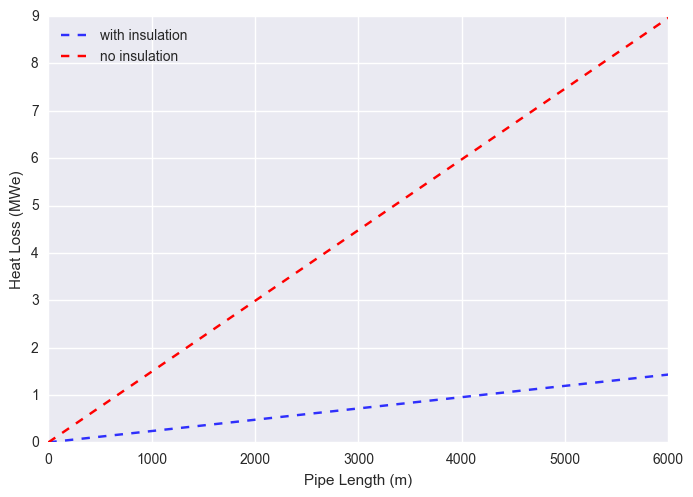

In [293]:
#show the plot
plt.show()

## Display the simulated values

In [294]:
print ('{:^16}'.format('Distance'), '{:^16}'.format('No Insulation'), '{:^16}'.format('With Insulation'),)
for i in range(len(x)): 
    print ('{:^16.0f}'.format(x[i]), '{:^16.2f}'.format(max_loss[i]), '{:^16.2f}'.format(normal_loss[i]))

    Distance      No Insulation   With Insulation 
       0               0.00             0.00      
      1000             1.49             0.24      
      2000             2.99             0.48      
      3000             4.48             0.72      
      4000             5.98             0.95      
      5000             7.47             1.19      
      6000             8.96             1.43      


# Quantify the effect of modifying pipeline insulation

* Using an insulation with lower thermal conductivity
* Increasing insulation thickness

# Effect of modifying the insulation material

In [295]:
loss_07 = calc_heat_loss(x, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, 0.07, r1, r2, r3)
loss_06 = calc_heat_loss(x, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, 0.06, r1, r2, r3)
loss_04 = calc_heat_loss(x, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, 0.04, r1, r2, r3)
loss_03 = calc_heat_loss(x, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, 0.03, r1, r2, r3)

plt.plot(x, max_loss, '--r', label='no insulation')
plt.plot(x, normal_loss, '--b', alpha=0.8, label='with insulation')
plt.plot(x, loss_07, ':c', label='k = 0.07', alpha=0.6)
plt.plot(x, loss_06, '-.c', label='k = 0.06', alpha=0.6)
plt.plot(x, loss_04, '-.m', label='k = 0.04', alpha=0.6)
plt.plot(x, loss_03, ':m', label='k = 0.03', alpha=0.6)
plt.xlabel("Pipe Length (m)")
plt.ylabel("Heat Loss (MWe)")
plt.legend(loc=2)

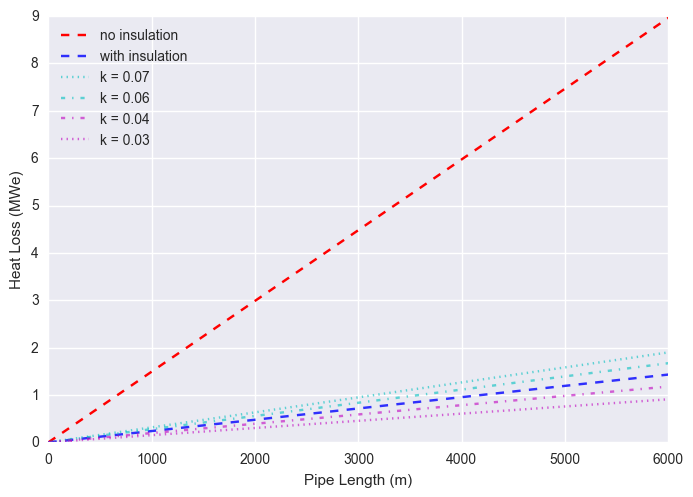

In [296]:
plt.show()

# Display the simulated values

In [303]:
print ('{:^16}'.format('Distance'), \
      '{:^16}'.format('k = 0.07'), '{:^16}'.format('k = 0.06'), '{:^16}'.format('k = 0.04'), '{:^16}'.format('k = 0.03'))
for i in range(len(x)): 
    print ('{:^16.0f}'.format(x[i]), \
        '{:^16.2f}'.format(loss_07[i]), '{:^16.2f}'.format(loss_06[i]), \
        '{:^16.2f}'.format(loss_04[i]), '{:^16.2f}'.format(loss_03[i]))

    Distance         k = 0.07         k = 0.06         k = 0.04         k = 0.03    
       0               0.00             0.00             0.00             0.00      
      1000             0.32             0.28             0.20             0.15      
      2000             0.63             0.56             0.39             0.30      
      3000             0.95             0.84             0.59             0.45      
      4000             1.27             1.11             0.79             0.61      
      5000             1.58             1.39             0.98             0.76      
      6000             1.90             1.67             1.18             0.91      


# Effect of increasing insulation thickness

In [298]:
r3 = id_pipe + t_pipe + 0.5 * 0.0254
loss_05in = calc_heat_loss(x, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, k_insulation, r1, r2, r3)
r3 = id_pipe + t_pipe + 1 * 0.0254
loss_1in = calc_heat_loss(x, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, k_insulation, r1, r2, r3)
r3 = id_pipe + t_pipe + 3 * 0.0254
loss_3in = calc_heat_loss(x, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, k_insulation, r1, r2, r3)
r3 = id_pipe + t_pipe + 4 * 0.0254
loss_4in = calc_heat_loss(x, t1, t2, h_steam_pipe, h_insulation_air, k_pipe, k_insulation, r1, r2, r3)

plt.plot(x, max_loss, '--r', label='no insulation')
plt.plot(x, normal_loss, '--b', alpha=0.8, label='with insulation')
plt.plot(x, loss_4in, ':c', label='t = 4 in', alpha=0.6)
plt.plot(x, loss_3in, '-.c', label='k = 3 in', alpha=0.6)
plt.plot(x, loss_1in, '-.m', label='k = 1 in', alpha=0.6)
plt.plot(x, loss_05in, ':m', label='k = 0.5 in', alpha=0.6)
plt.xlabel("Pipe Length (m)")
plt.ylabel("Heat Loss (MWe)")
plt.legend(loc=2)

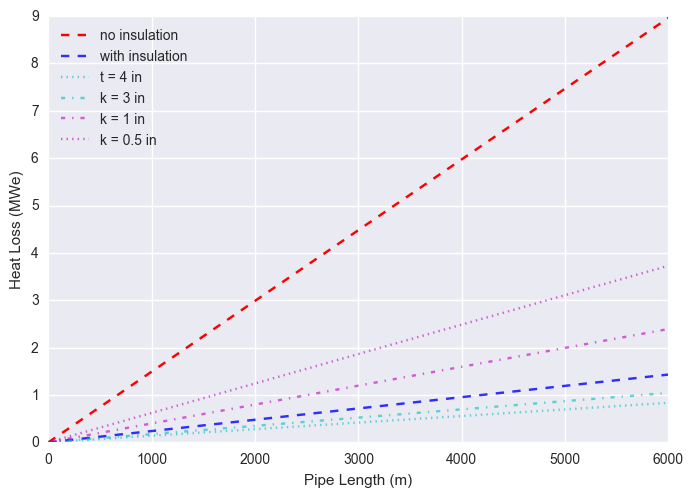

In [299]:
plt.show()

# Display the simulated values

In [304]:
print ('{:^16}'.format('Distance'), \
      '{:^16}'.format('t = 0.5 in'), '{:^16}'.format('t = 1 in'), '{:^16}'.format('t = 3 in'), '{:^16}'.format('t = 4 in'))
for i in range(len(x)): 
    print ('{:^16.0f}'.format(x[i]), \
        '{:^16.2f}'.format(loss_05in[i]), '{:^16.2f}'.format(loss_1in[i]), \
        '{:^16.2f}'.format(loss_3in[i]), '{:^16.2f}'.format(loss_4in[i]))

    Distance        t = 0.5 in        t = 1 in         t = 3 in         t = 4 in    
       0               0.00             0.00             0.00             0.00      
      1000             0.62             0.40             0.17             0.14      
      2000             1.24             0.80             0.35             0.28      
      3000             1.86             1.20             0.52             0.42      
      4000             2.49             1.60             0.70             0.56      
      5000             3.11             1.99             0.87             0.70      
      6000             3.73             2.39             1.04             0.83      


### References:

Rajput, R.K. (1999). Heat and mass transfer: New Delhi, India, S. Chand and Company Ltd., 691 pp.

Verma, M. P. (2013). Steam transport simulation in a geothermal pipeline network constrained by internally consistent thermodynamic properties of water. Revista Mexicana de Ciencias Geol√≥gicas, 30(1), 210-221.

